In [33]:
import numpy as np
import xarray as xr
import os.path as op
from dask.diagnostics import ProgressBar
from xmitgcm import open_mdsdataset
from xgcm.grid import Grid
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/rigel/ocp/users/tu2140/MITgcm/SO_only-physics/channel_flat/runs/cooling-surftemp/'

In [23]:
ts,te = (6091344,6350544)

In [24]:
ds = open_mdsdataset(ddir, iters=range(ts,te,144), prefix=['SurfTflux','PotTtave'], 
                     delta_t=6e2, geometry='cartesian', ignore_unknown_vars=True)
ds

/rigel/home/tu2140/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/rigel/home/tu2140/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:              (XC: 100, XG: 100, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, layer_1TH_bounds: 43, layer_1TH_center: 42, layer_1TH_interface: 41, time: 1800)
Coordinates:
  * XC                   (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 ...
  * YC                   (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 ...
  * XG                   (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 ...
  * YG                   (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 ...
  * Z                    (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 ...
  * Zp1                  (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 ...
  * Zu                   (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 ...
  * Zl                   (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 ...
    rA                   (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dxG                  (YG, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>


In [25]:
month = np.tile(np.repeat(range(1,13),30),5)
ds.coords['month'] = ('time',month)

In [15]:
surFortT = ds.surForcT
Trelax = ds.TRELAX
Tflux = ds.TFLUX
Qnet = ds.oceQnet
Qsw = ds.oceQsw

<xarray.DataArray 'TRELAX' (time: 1800, YC: 200, XC: 100)>
dask.array<shape=(1800, 200, 100), dtype=float32, chunksize=(1, 200, 100)>
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth    (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    iter     (time) int64 dask.array<shape=(1800,), chunksize=(1,)>
  * time     (time) float64 3.655e+09 3.655e+09 3.655e+09 3.655e+09 ...
    month    (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
Attributes:
    standard_name:  TRELAX
    long_name:      surface temperature relaxation, >0 increases theta
    units:          W/m^2

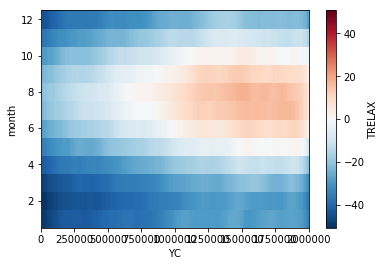

In [11]:
Trelax_mon = Trelax.groupby('month').mean(['time','XC'])
Trelax_mon.plot()
Trelax

<xarray.DataArray 'TFLUX' (time: 1800, YC: 200, XC: 100)>
dask.array<shape=(1800, 200, 100), dtype=float32, chunksize=(1, 200, 100)>
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth    (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    iter     (time) int64 dask.array<shape=(1800,), chunksize=(1,)>
  * time     (time) float64 3.655e+09 3.655e+09 3.655e+09 3.655e+09 ...
    month    (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
Attributes:
    standard_name:  TFLUX
    long_name:      total heat flux (match heat-content variations), >0 incre...
    units:          W/m^2

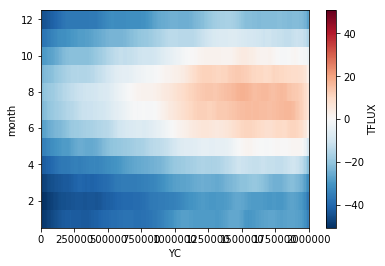

In [12]:
Tflux_mon = Tflux.groupby('month').mean(['time','XC'])
Tflux_mon.plot()
Tflux

<xarray.DataArray 'surForcT' (time: 1800, YC: 200, XC: 100)>
dask.array<shape=(1800, 200, 100), dtype=float32, chunksize=(1, 200, 100)>
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth    (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    iter     (time) int64 dask.array<shape=(1800,), chunksize=(1,)>
  * time     (time) float64 3.655e+09 3.655e+09 3.655e+09 3.655e+09 ...
    month    (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
Attributes:
    standard_name:  surForcT
    long_name:      model surface forcing for Temperature, >0 increases theta
    units:          W/m^2

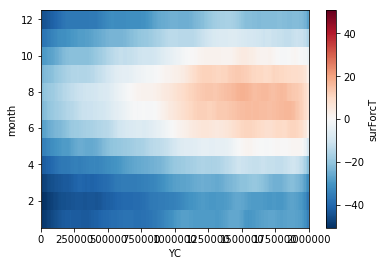

In [16]:
surFortT_mon = surFortT.groupby('month').mean(['time','XC'])
surFortT_mon.plot()
surFortT

In [20]:
dtype = '>f8'
fname = op.join('/rigel/ocp/users/tu2140/chkp63n/MITgcm/Southern-Ocean/channel_flat/input',
                'SST_linear_010km.bin')
shape = (12,200,100)
ForcT = np.fromfile(fname, dtype=dtype)
ForcT.shape = shape
ForcT = xr.DataArray(ForcT, dims=['month','YC','XC'], 
                     coords={'month':range(1,13),'YC':ds.YC.data,'XC':ds.XC.data})
ForcT

<xarray.DataArray (month: 12, YC: 200, XC: 100)>
array([[[  8.660254e-01,   8.660254e-01, ...,   8.660254e-01,   8.660254e-01],
        [  9.206285e-01,   9.206285e-01, ...,   9.206285e-01,   9.206285e-01],
        ..., 
        [  1.167745e+01,   1.167745e+01, ...,   1.167745e+01,   1.167745e+01],
        [  1.173205e+01,   1.173205e+01, ...,   1.173205e+01,   1.173205e+01]],

       [[  1.000000e+00,   1.000000e+00, ...,   1.000000e+00,   1.000000e+00],
        [  1.055276e+00,   1.055276e+00, ...,   1.055276e+00,   1.055276e+00],
        ..., 
        [  1.194472e+01,   1.194472e+01, ...,   1.194472e+01,   1.194472e+01],
        [  1.200000e+01,   1.200000e+01, ...,   1.200000e+01,   1.200000e+01]],

       ..., 
       [[ -1.836970e-16,  -1.836970e-16, ...,  -1.836970e-16,  -1.836970e-16],
        [  5.025126e-02,   5.025126e-02, ...,   5.025126e-02,   5.025126e-02],
        ..., 
        [  9.949749e+00,   9.949749e+00, ...,   9.949749e+00,   9.949749e+00],
        [  1.000000e+01

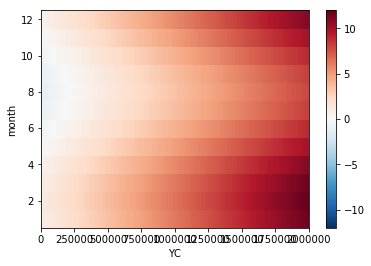

In [21]:
ForcT.mean('XC').plot()

<xarray.DataArray 'THETA' (time: 1800, YC: 200, XC: 100)>
dask.array<shape=(1800, 200, 100), dtype=float32, chunksize=(1, 200, 100)>
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
    Z        >f4 -5.0
    rA       (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth    (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    drF      >f4 dask.array<shape=(), chunksize=()>
    PHrefC   >f4 dask.array<shape=(), chunksize=()>
    hFacC    (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    iter     (time) int64 dask.array<shape=(1800,), chunksize=(1,)>
  * time     (time) float64 3.655e+09 3.655e+09 3.655e+09 3.655e+09 ...
    month    (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
Attributes:
    standard_name:  THETA
    long_name:      Potential Temperature
    units:          degC

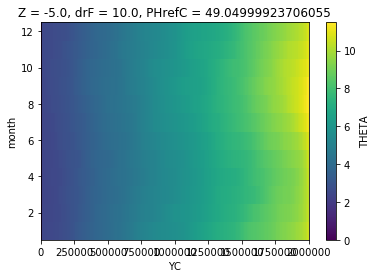

In [27]:
sst = ds.THETA[:,0]
sst_mon = sst.groupby('month').mean(['time','XC'])
sst_mon.plot()
sst

In [40]:
cs = 1e-3
cp = 1158.
rhoa = 1.225
u10 = 1e1
with ProgressBar():
    Tflx_est = rhoa*cp*cs*u10*(ForcT.mean('XC') - sst_mon).compute()
Tflx_est

[########################################] | 100% Completed |  7.9s


<xarray.DataArray (month: 12, YC: 200)>
array([[  1.228500e+01,  -2.108197e+01,  -2.071409e+01, ...,   1.980897e+01,
          1.870343e+01,   1.676449e+01],
       [  1.418550e+01,  -1.862469e+01,  -1.809068e+01, ...,   2.604099e+01,
          2.466465e+01,   2.256251e+01],
       [  1.228500e+01,  -1.990116e+01,  -1.933962e+01, ...,   2.273766e+01,
          2.118146e+01,   1.942960e+01],
       ..., 
       [ -7.092750e+00,  -4.095253e+01,  -4.076352e+01, ...,  -2.884930e+01,
         -2.928451e+01,  -3.070444e+01],
       [ -2.605834e-15,  -3.443760e+01,  -3.413407e+01, ...,  -1.161833e+01,
         -1.259573e+01,  -1.404651e+01],
       [  7.092750e+00,  -2.706538e+01,  -2.665931e+01, ...,   5.789798e+00,
          4.886008e+00,   2.993701e+00]])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
    Z        >f4 -5.0
    drF      float32 10.0
    PHrefC   float32 49.05

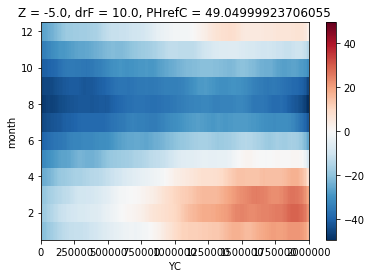

In [41]:
Tflx_est.plot()